In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv(r'credit_customers.csv')
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.describe(include='all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,NaN,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [5]:
data.foreign_worker.value_counts()

foreign_worker
yes    963
no      37
Name: count, dtype: int64

In [6]:
data.other_parties.value_counts()

other_parties
none            907
guarantor        52
co applicant     41
Name: count, dtype: int64

In [7]:
data.drop(['foreign_worker', 'other_parties'], axis=1, inplace=True)

In [8]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
class                     0
dtype: int64

In [9]:
data['class'] = data['class'].map({'good':0,'bad':1})

In [10]:
for var in data.columns:
    if var == 'class':
        continue  

    if data[var].dtypes != object:
        
        q1 = data[var].quantile(0.25)
        q2 = data[var].quantile(0.5)
        q3 = data[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')

        grouped = data.groupby(['category_' + var, 'class'])['class'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)

    elif data[var].dtypes == object:

        grouped = data.groupby([var, 'class'])['class'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data = data.merge(grouped[[var, var + '_woe']], how='left', on=var)

C:\Users\intern\AppData\Local\Temp\ipykernel_17120\3281464641.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'class'])['class'].count().unstack().reset_index()
C:\Users\intern\AppData\Local\Temp\ipykernel_17120\3281464641.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['category_' + var, 'class'])['class'].count().unstack().reset_index()
C:\Users\intern\AppData\Local\Temp\ipykernel_17120\3281464641.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observ

In [11]:
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,class,checking_status_woe,category_duration,duration_woe,credit_history_woe,purpose_woe,category_credit_amount,credit_amount_woe,savings_status_woe,employment_woe,category_installment_commitment,installment_commitment_woe,personal_status_woe,category_residence_since,residence_since_woe,property_magnitude_woe,category_age,age_woe,other_payment_plans_woe,housing_woe,category_existing_credits,existing_credits_woe,job_woe,category_num_dependents,num_dependents_woe,own_telephone_woe
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,0,-0.818099,"(-inf, 12.0]",0.467416,0.733741,0.410063,"(-inf, 1365.5]",-0.037812,0.704246,0.235566,"(3.0, 4.0]",-0.157300,0.165548,"(3.0, 4.0]",-0.001153,0.461035,"(42.0, inf]",0.223144,0.121179,0.194156,"(1.0, 2.0]",0.115710,0.022780,"(-inf, 1.0]",-0.002816,0.098638
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,1,-0.401392,"(24.0, inf]",-0.620240,-0.088319,0.410063,"(3972.25, inf]",-0.524524,-0.271358,-0.032103,"(-inf, 2.0]",0.190473,-0.235341,"(-inf, 2.0]",-0.017335,0.461035,"(-inf, 27.0]",-0.305191,0.121179,0.194156,"(-inf, 1.0]",-0.074877,0.022780,"(-inf, 1.0]",-0.002816,-0.064691
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,0,1.176263,"(-inf, 12.0]",0.467416,0.733741,-0.606136,"(1365.5, 2319.5]",0.262010,-0.271358,0.394415,"(-inf, 2.0]",0.190473,0.165548,"(2.0, 3.0]",0.054941,0.461035,"(42.0, inf]",0.223144,0.121179,0.194156,"(-inf, 1.0]",-0.074877,0.097164,"(1.0, inf]",0.015409,-0.064691
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,0,-0.818099,"(24.0, inf]",-0.620240,-0.088319,-0.095557,"(3972.25, inf]",-0.524524,-0.271358,0.394415,"(-inf, 2.0]",0.190473,0.165548,"(3.0, 4.0]",-0.001153,-0.028573,"(42.0, inf]",0.223144,0.121179,-0.472604,"(-inf, 1.0]",-0.074877,0.022780,"(1.0, inf]",0.015409,-0.064691
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,1,-0.818099,"(18.0, 24.0]",0.025642,-0.085158,-0.359200,"(3972.25, inf]",-0.524524,-0.271358,-0.032103,"(2.0, 3.0]",0.064539,0.165548,"(3.0, 4.0]",-0.001153,-0.586082,"(42.0, inf]",0.223144,0.121179,-0.472604,"(1.0, 2.0]",0.115710,0.022780,"(1.0, inf]",0.015409,-0.064691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,0,1.176263,"(-inf, 12.0]",0.467416,-0.088319,-0.095557,"(1365.5, 2319.5]",0.262010,-0.271358,0.394415,"(2.0, 3.0]",0.064539,-0.235341,"(3.0, 4.0]",-0.001153,0.461035,"(27.0, 33.0]",-0.134083,0.121179,0.194156,"(-inf, 1.0]",-0.074877,0.097164,"(-inf, 1.0]",-0.002816,-0.064691
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,0,-0.818099,"(24.0, inf]",-0.620240,-0.088319,0.773836,"(2319.5, 3972.25]",0.395209,-0.271358,-0.032103,"(3.0, 4.0]",-0.157300,-0.441833,"(3.0, 4.0]",-0.001153,-0.028573,"(33.0, 42.0]",0.322189,0.121179,0.194156,"(-inf, 1.0]",-0.074877,-0.204413,"(-inf, 1.0]",-0.002816,0.098638
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,4.0,car,38.0,none,own,1.0,skilled,1.0,none,0,1.176263,"(-inf, 12.0]",0.467416,-0.088319,0.41006

In [12]:
def target_correlation(data, target, threshold=0.1):
    
    woe_features = data.filter(regex='_woe$', axis=1)
    woe_features[target] = data[target] 
    
    corr_matrix = woe_features.corr(method='spearman')
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target

target_result = target_correlation(data, 'class')

target_result

C:\Users\intern\AppData\Local\Temp\ipykernel_17120\1980278123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woe_features[target] = data[target]


,Variable,Correlation with Target
0,checking_status_woe,-0.347944
1,duration_woe,-0.179965
2,credit_history_woe,-0.221606
3,purpose_woe,-0.179875
4,credit_amount_woe,-0.158096
5,savings_status_woe,-0.178989
6,employment_woe,-0.132734
7,property_magnitude_woe,-0.140851
8,age_woe,-0.116511
9,other_payment_plans_woe,-0.113046


In [13]:
def intercorrelation_woe(data, target=None, threshold=0.7):
    woe_features = data.filter(regex='_woe$', axis=1)
    
    if target in woe_features.columns:
        woe_features = woe_features.drop(columns=[target])
    
    corr_matrix = woe_features.corr(method='spearman', numeric_only=True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    result_intercorrelated_independent = pd.DataFrame({
        'Variable 1': corr_matrix.index[independent_variable_pairs[0]],
        'Variable 2': corr_matrix.columns[independent_variable_pairs[1]],
    })
    
    return result_intercorrelated_independent
    
intercorrelated_result = intercorrelation_woe(data, 'class')
intercorrelated_result

,Variable 1,Variable 2


# Logistic regression

In [14]:
target_result.Variable.tolist()

['checking_status_woe',
 'duration_woe',
 'credit_history_woe',
 'purpose_woe',
 'credit_amount_woe',
 'savings_status_woe',
 'employment_woe',
 'property_magnitude_woe',
 'age_woe',
 'other_payment_plans_woe',
 'housing_woe']

In [15]:
X_log = data[['checking_status_woe',
 'duration_woe',
 'credit_history_woe',
 'purpose_woe',
 'credit_amount_woe',
 'savings_status_woe',
 'employment_woe',
 'property_magnitude_woe',
 'age_woe',
 'other_payment_plans_woe',
 'housing_woe']]
y = data['class']

In [16]:
X_train_log, X_test_log, y_train, y_test = train_test_split(X_log, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def evaluate(model, X_train_log, y_train, X_test_log, y_test):
    
    '''Predictions and probabilities for the training set'''
    
    y_train_pred = model.predict(X_train_log)
    y_train_prob = model.predict_proba(X_train_log)[:, 1]

    '''Predictions and probabilities for the test set'''
    
    y_test_pred = model.predict(X_test_log)
    y_test_prob = model.predict_proba(X_test_log)[:, 1]

    '''Calculate metrics for the training set''' 
    
    roc_train_prob = roc_auc_score(y_train, y_train_prob)
    gini_train_prob = roc_train_prob * 2 - 1
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)

    '''Calculate metrics for the test set'''
    
    roc_test_prob = roc_auc_score(y_test, y_test_prob)
    gini_test_prob = roc_test_prob * 2 - 1
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)

    results = pd.DataFrame({
        'Dataset': ['Train', 'Test'],
        'Gini': [gini_train_prob * 100, gini_test_prob * 100],
        'Precision': [precision_train, precision_test],
        'Recall': [recall_train, recall_test]
    })

    confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    
    return results , confusion_matrix

In [18]:
clf = LogisticRegression()
clf.fit(X_train_log, y_train)

LogisticRegression()

In [19]:
result = evaluate(clf, X_train_log, y_train, X_test_log, y_test)
result

(  Dataset       Gini  Precision    Recall
 0   Train  61.800446   0.641379  0.444976
 1    Test  62.321889   0.642857  0.395604,
 array([[189,  20],
        [ 55,  36]]))

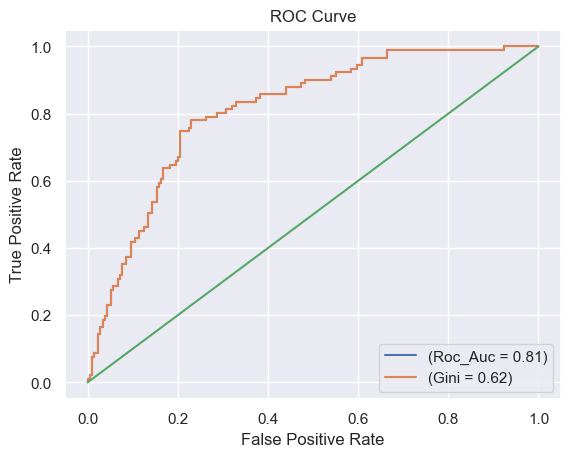

In [20]:
y_prob = clf.predict_proba(X_test_log)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [21]:
clf_balanced = LogisticRegression(class_weight='balanced')
clf_balanced.fit(X_train_log, y_train)

LogisticRegression(class_weight='balanced')

In [22]:
result_balanced = evaluate(clf_balanced, X_train_log, y_train, X_test_log, y_test)
result_balanced

(  Dataset       Gini  Precision    Recall
 0   Train  61.794599   0.538983  0.760766
 1    Test  62.500657   0.569106  0.769231,
 array([[156,  53],
        [ 21,  70]]))

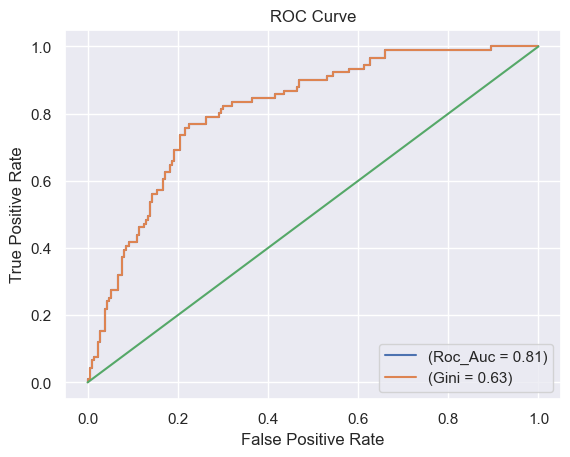

In [23]:
y_prob = clf_balanced.predict_proba(X_test_log)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [24]:
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train_log.columns:
    X_train_log_single_var = X_train_log[[i]]
    X_test_log_single_var = X_test_log[[i]]

    
    clf.fit(X_train_log_single_var, y_train)
    
    y_pred_train_single_var = clf.predict_proba(X_train_log_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    
    y_pred_test_single_var = clf.predict_proba(X_test_log_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

,Variable,Train Gini,Test Gini
0,checking_status_woe,0.3933,0.4651
1,duration_woe,0.1940,0.2769
6,employment_woe,0.1204,0.2568
5,savings_status_woe,0.1761,0.2517
9,other_payment_plans_woe,0.0733,0.1504
4,credit_amount_woe,0.2119,0.1487
2,credit_history_woe,0.3001,0.1423
3,purpose_woe,0.2592,0.1314
7,property_magnitude_woe,0.1929,0.1195
8,age_woe,0.1591,0.1037


In [25]:
filtered_df = results_df_sorted[
    (results_df_sorted['Test Gini'] > 0.25) &
    (abs(results_df_sorted['Train Gini'] - results_df_sorted['Test Gini']) <= 0.15)
]

filtered_df

,Variable,Train Gini,Test Gini
0,checking_status_woe,0.3933,0.4651
1,duration_woe,0.1940,0.2769
6,employment_woe,0.1204,0.2568
5,savings_status_woe,0.1761,0.2517


In [26]:
filtered_df.Variable.tolist()

['checking_status_woe', 'duration_woe', 'employment_woe', 'savings_status_woe']

In [27]:
X_log_uni = data[['checking_status_woe', 'duration_woe', 'employment_woe', 'savings_status_woe']]
y = data['class']

In [28]:
X_train_log_uni, X_test_log_uni, y_train_uni, y_test_uni = train_test_split(X_log_uni, y, test_size=0.3, random_state=42)

In [29]:
clf_uni = LogisticRegression()
clf_uni.fit(X_train_log_uni, y_train_uni)

LogisticRegression()

In [30]:
result_uni = evaluate(clf_uni, X_train_log_uni, y_train_uni, X_test_log_uni, y_test_uni)
result_uni

(  Dataset    Gini  Precision  Recall
 0   Train 49.6370     0.6261  0.3445
 1    Test 60.9548     0.6727  0.4066,
 array([[191,  18],
        [ 54,  37]]))

# Random forest

In [31]:
data.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone', 'class',
       'checking_status_woe', 'category_duration', 'duration_woe',
       'credit_history_woe', 'purpose_woe', 'category_credit_amount',
       'credit_amount_woe', 'savings_status_woe', 'employment_woe',
       'category_installment_commitment', 'installment_commitment_woe',
       'personal_status_woe', 'category_residence_since',
       'residence_since_woe', 'property_magnitude_woe', 'category_age',
       'age_woe', 'other_payment_plans_woe', 'housing_woe',
       'category_existing_credits', 'existing_credits_woe', 'job_woe',
       'category_num_dependents', 'num_dependents_woe', 'own_telephone_woe'],
      dtype='object')

In [32]:
data['checking_status'] = data['checking_status'].map({
    'no checking': 0,
    '<0': 1,
    '0<=X<200': 2,
    '>=200': 3
})
data['savings_status'] = data['savings_status'].map({
    'no known savings': 0,
    '<100': 1,
    '100<=X<500': 2,
    '500<=X<1000': 3,
    '>=1000': 4
})
data['employment'] = data['employment'].map({
    'unemployed': 0,
    '<1': 1,
    '1<=X<4': 2,
    '4<=X<7': 3,
    '>=7': 4
})
data['own_telephone'] = data['own_telephone'].map({'yes':1,'none':0})

In [33]:
le = LabelEncoder()

label_cols = ['credit_history', 'purpose', 'personal_status', 'property_magnitude', 'other_payment_plans', 'housing', 'job']

for i in label_cols:
    data[i] = le.fit_transform(data[i])

data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,class,checking_status_woe,category_duration,duration_woe,credit_history_woe,purpose_woe,category_credit_amount,credit_amount_woe,savings_status_woe,employment_woe,category_installment_commitment,installment_commitment_woe,personal_status_woe,category_residence_since,residence_since_woe,property_magnitude_woe,category_age,age_woe,other_payment_plans_woe,housing_woe,category_existing_credits,existing_credits_woe,job_woe,category_num_dependents,num_dependents_woe,own_telephone_woe
0,1,6.0000,1,6,1169.0000,0,4,4.0000,3,4.0000,3,67.0000,1,1,2.0000,1,1.0000,1,0,-0.8181,"(-inf, 12.0]",0.4674,0.7337,0.4101,"(-inf, 1365.5]",-0.0378,0.7042,0.2356,"(3.0, 4.0]",-0.1573,0.1655,"(3.0, 4.0]",-0.0012,0.4610,"(42.0, inf]",0.2231,0.1212,0.1942,"(1.0, 2.0]",0.1157,0.0228,"(-inf, 1.0]",-0.0028,0.0986
1,2,48.0000,3,6,5951.0000,1,2,2.0000,0,2.0000,3,22.0000,1,1,1.0000,1,1.0000,0,1,-0.4014,"(24.0, inf]",-0.6202,-0.0883,0.4101,"(3972.25, inf]",-0.5245,-0.2714,-0.0321,"(-inf, 2.0]",0.1905,-0.2353,"(-inf, 2.0]",-0.0173,0.4610,"(-inf, 27.0]",-0.3052,0.1212,0.1942,"(-inf, 1.0]",-0.0749,0.0228,"(-inf, 1.0]",-0.0028,-0.0647
2,0,12.0000,1,2,2096.0000,1,3,2.0000,3,3.0000,3,49.0000,1,1,1.0000,3,2.0000,0,0,1.1763,"(-inf, 12.0]",0.4674,0.7337,-0.6061,"(1365.5, 2319.5]",0.2620,-0.2714,0.3944,"(-inf, 2.0]",0.1905,0.1655,"(2.0, 3.0]",0.0549,0.4610,"(42.0, inf]",0.2231,0.1212,0.1942,"(-inf, 1.0]",-0.0749,0.0972,"(1.0, inf]",0.0154,-0.0647
3,1,42.0000,3,3,7882.0000,1,3,2.0000,3,4.0000,1,45.0000,1,0,1.0000,1,2.0000,0,0,-0.8181,"(24.0, inf]",-0.6202,-0.0883,-0.0956,"(3972.25, inf]",-0.5245,-0.2714,0.3944,"(-inf, 2.0]",0.1905,0.1655,"(3.0, 4.0]",-0.0012,-0.0286,"(42.0, inf]",0.2231,0.1212,-0.4726,"(-inf, 1.0]",-0.0749,0.0228,"(1.0, inf]",0.0154,-0.0647
4,1,24.0000,2,4,4870.0000,1,2,3.0000,3,4.0000,2,53.0000,1,0,2.0000,1,2.0000,0,1,-0.8181,"(18.0, 24.0]",0.0256,-0.0852,-0.3592,"(3972.25, inf]",-0.5245,-0.2714,-0.0321,"(2.0, 3.0]",0.0645,0.1655,"(3.0, 4.0]",-0.0012,-0.5861,"(42.0, inf]",0.2231,0.1212,-0.4726,"(1.0, 2.0]",0.1157,0.0228,"(1.0, inf]",0.0154,-0.0647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12.0000,3,3,1736.0000,1,3,3.0000,0,4.0000,3,31.0000,1,1,1.0000,3,1.0000,0,0,1.1763,"(-inf, 12.0]",0.4674,-0.0883,-0.0956,"(1365.5, 2319.5]",0.2620,-0.2714,0.3944,"(2.0, 3.0]",0.0645,-0.2353,"(3.0, 4.0]",-0.0012,0.4610,"(27.0, 33.0]",-0.1341,0.1212,0.1942,"(-inf, 1.0]",-0.0749,0.0972,"(-inf, 1.0]",-0.0028,-0.0647
996,1,30.0000,3,9,3857.0000,1,2,4.0000,1,4.0000,1,40.0000,1,1,1.0000,0,1.0000,1,0,-0.8181,"(24.0, inf]",-0.6202,-0.0883,0.7738,"(2319.5, 3972.25]",0.3952,-0.2714,-0.0321,"(3.0, 4.0]",-0.1573,-0.4418,"(3.0, 4.0]",-0.0012,-0.0286,"(33.0, 42.0]",0.3222,0.1212,0.1942,"(-inf, 1.0]",-0.0749,-0.2044,"(-inf, 1.0]",-0.0028,0.0986
997,0,12.0000,3,6,804.0000,1,4,4.0000,3,4.0000,0,38.0000,1,1,1.0000,1,1.0000,0,0,1.1763,"(-inf, 12.0]",0.4674,-0.0883,0.4101,"(-inf, 1365.5]",-0.0378,-0.2714,0.2356,"(3.0, 4.0]",-0.1573,0.1655,"(3.0, 4.0]",-0.0012,-0.0342,"(33.0, 42.0]",0.3222,0.1212,0.1942,"(-inf, 1.0]",-0.0749,0.0228,"(-inf, 1.0]",-0.0028,-0.0647
998,1,45.0000,3,6,1845.0000,1,2,4.0000,3,4.0000,2,23.0000,1,0,1.0000,1,1.0000,1,1,-0.8181,"(24.0, inf]",-0.6202,-0.0883,0.4101,"(1365.5, 2319.5]",0.2620,-0.2714,-0.0321,"(3.0, 4.0]",-0.1573,0.1655,"(3.0, 4.0]",-0.0012,-0.5861,"(-inf, 27.0]",-0.3052,0.1212,-0.4726,"(-inf, 1.0]",-0.0749,0.0228,"(-inf, 1.0]",-0.0028,0.0986


In [34]:
X_rf = data[['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone']]
y = data['class']

In [35]:
X_train_rf,  X_test_rf,  y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)

In [36]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train_rf, y_train)

RandomForestClassifier(random_state=42)

In [37]:
result = evaluate(rfc, X_train_rf, y_train, X_test_rf, y_test)
result

(  Dataset     Gini  Precision  Recall
 0   Train 100.0000     1.0000  1.0000
 1    Test  57.2848     0.6739  0.3407,
 array([[194,  15],
        [ 60,  31]]))

In [38]:
def plot_feature_importances(model, feature_names):
    
    importances = model.feature_importances_
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)
   
    
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.title("Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis() 
    plt.show()
    
    return importance_df

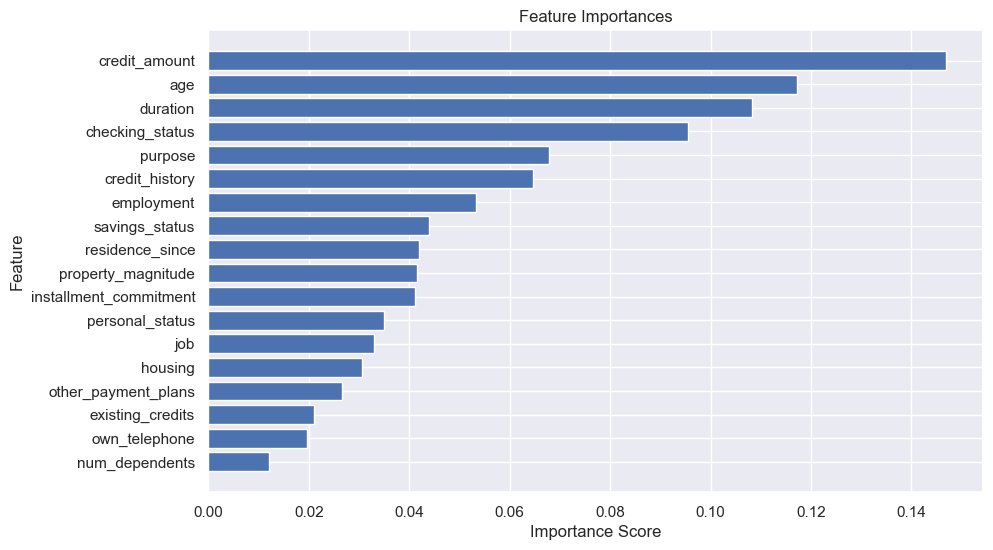

,Feature,Importance
4,credit_amount,0.1470
11,age,0.1171
1,duration,0.1082
0,checking_status,0.0955
3,purpose,0.0679
2,credit_history,0.0646
6,employment,0.0533
5,savings_status,0.0440
9,residence_since,0.0418
10,property_magnitude,0.0416


In [39]:
feature_names = X_train_rf.columns

feature_importance_df = plot_feature_importances(rfc, feature_names)

feature_importance_df

In [40]:
X_train_rf.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone'],
      dtype='object')

In [41]:
clfRF_selected = RandomForestClassifier(random_state=42)

clfRF_selected.fit(X_train_rf[['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment']],y_train)

RandomForestClassifier(random_state=42)

In [42]:
result = evaluate(clfRF_selected, X_train_rf[['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment']],y_train,
                  X_test_rf[['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment']], y_test)
result

(  Dataset     Gini  Precision  Recall
 0   Train 100.0000     1.0000  1.0000
 1    Test  53.5990     0.6721  0.4505,
 array([[189,  20],
        [ 50,  41]]))

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]

random_grid = {'n_estimators': n_estimators,
               'max_features': ['sqrt', 0.3, 0.5, None],
               'max_depth': max_depth,
               'min_samples_split': [20,50],
               'min_samples_leaf': [5, 8, 10]}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['sqrt', 0.3, 0.5, None], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100], 'min_samples_split': [20, 50], 'min_samples_leaf': [5, 8, 10]}


In [44]:
rf_random = RandomizedSearchCV(
                    estimator=rfc, 
                    param_distributions=random_grid, 
                    n_iter=25,  
                    cv=3, 
                    verbose=1, 
                    random_state=42, 
                    n_jobs=-1)

rf_random.fit(X_train_rf, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['sqrt', 0.3, 0.5,
                                                         None],
                                        'min_samples_leaf': [5, 8, 10],
                                        'min_samples_split': [20, 50],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=1)

In [45]:
rf_random.best_params_

{'n_estimators': 555,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 0.5,
 'max_depth': 91}

In [46]:
optimized_model = rf_random.best_estimator_
evaluate(optimized_model, X_train_rf, y_train, X_test_rf, y_test)

(  Dataset    Gini  Precision  Recall
 0   Train 84.0283     0.8720  0.5215
 1    Test 56.9588     0.6944  0.2747,
 array([[198,  11],
        [ 66,  25]]))